In [1]:
import os

import dotenv
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI

In [2]:
dotenv.load_dotenv()

True

## Sample Langchain Gemini chat

In [20]:
# Initialize model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

E0000 00:00:1758466930.667727 31404670 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [4]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
result = chain.invoke(
    {
        "input_language": "English",
        "output_language": "German",
        "input": "I love programming.",
    }
)
print(result.content)  # Output: Ich liebe Programmieren.

Ich liebe das Programmieren.


## Gemini for Instagram post

In [5]:
TONE_OPTIONS = [
    "Professional",
    "Casual",
    "Friendly",
    "Humorous",
    "Formal",
    "Inspirational",
    "Educational",
    "Conversational",
]

In [6]:
tone = "Professional"
includeEmoji = True
includeHashtags = True

In [7]:
system_prompt = (
    f"You are a skilled social media writer who creates {tone.lower()} content that resonates with the audience. Your writing should:\n"
    f"- Maintain a consistent {tone.lower()} tone throughout\n"
    "- Use natural, conversational language\n"
    "- Be concise and impactful\n"
    f"{'- Use emojis thoughtfully and sparingly\n' if includeEmoji else '- Avoid using emojis\n'}"
    f"{'- Include relevant hashtags that add value\n' if includeHashtags else '- Exclude hashtags\n'}"
    "- Express emotions and enthusiasm through well-crafted words\n"
    "- Focus on creating genuine connections with the audience)\n"
    "Additional notes:\n"
    "- Focus on visual storytelling\n"
    "- Keep the tone engaging and authentic\n"
    f"{'- Add 3-5 relevant hashtags at the end' if includeHashtags else ''}"
)

In [8]:
print(system_prompt)

You are a skilled social media writer who creates professional content that resonates with the audience. Your writing should:
- Maintain a consistent professional tone throughout
- Use natural, conversational language
- Be concise and impactful
- Use emojis thoughtfully and sparingly
- Include relevant hashtags that add value
- Express emotions and enthusiasm through well-crafted words
- Focus on creating genuine connections with the audience)
Additional notes:
- Focus on visual storytelling
- Keep the tone engaging and authentic
- Add 3-5 relevant hashtags at the end


In [9]:
human_prompt = (
    "Write a {platform} post about: {description}\n"
    "Key guidelines:\n"
    "- Write in a {tone} tone\n"
    "- Aim for approximately {wordLimit} words\n"
    "- Write in a natural, conversational style\n"
    "- Use simple, everyday language\n"
)

In [10]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", human_prompt),
    ]
)

chain = prompt | llm
result = chain.invoke(
    {
        "platform": "Instagram",
        "description": "introducing Tryba's doors and windows products with a focus on quality, cost efficiency, and customer satisfaction",
        "tone": tone.lower(),
        "wordLimit": 200,
    }
)

In [11]:
print(result.content)

At Tryba, we're thrilled to introduce you to a world where exceptional quality meets outstanding value in doors and windows. We understand that your home is more than just a place; it's where memories are made, and comfort is paramount.

That's why every Tryba door and window is crafted with meticulous attention to detail, using only the finest materials. We're committed to durability, security, and timeless design, ensuring your investment stands the test of time and enhances your home's aesthetic for years to come.

But quality doesn't have to come at an exorbitant price. Our focus on innovative engineering and efficient processes means we deliver products that are not only built to last but also offer significant long-term cost efficiency. Think reduced energy bills and minimal maintenance – true value that pays for itself.

Ultimately, our greatest reward is your satisfaction. From your initial consultation to installation and beyond, our dedicated team is here to ensure a seamless

In [12]:
result

AIMessage(content="At Tryba, we're thrilled to introduce you to a world where exceptional quality meets outstanding value in doors and windows. We understand that your home is more than just a place; it's where memories are made, and comfort is paramount.\n\nThat's why every Tryba door and window is crafted with meticulous attention to detail, using only the finest materials. We're committed to durability, security, and timeless design, ensuring your investment stands the test of time and enhances your home's aesthetic for years to come.\n\nBut quality doesn't have to come at an exorbitant price. Our focus on innovative engineering and efficient processes means we deliver products that are not only built to last but also offer significant long-term cost efficiency. Think reduced energy bills and minimal maintenance – true value that pays for itself.\n\nUltimately, our greatest reward is your satisfaction. From your initial consultation to installation and beyond, our dedicated team is 

In [13]:
result.usage_metadata

{'input_tokens': 175,
 'output_tokens': 1289,
 'total_tokens': 1464,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 1008}}

## Image model

Input: text + image

Output: text + image

In [14]:
from IPython.display import Image, display

In [15]:
import base64

# Using a local image
local_image_path = "input_image.webp"
with open(local_image_path, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

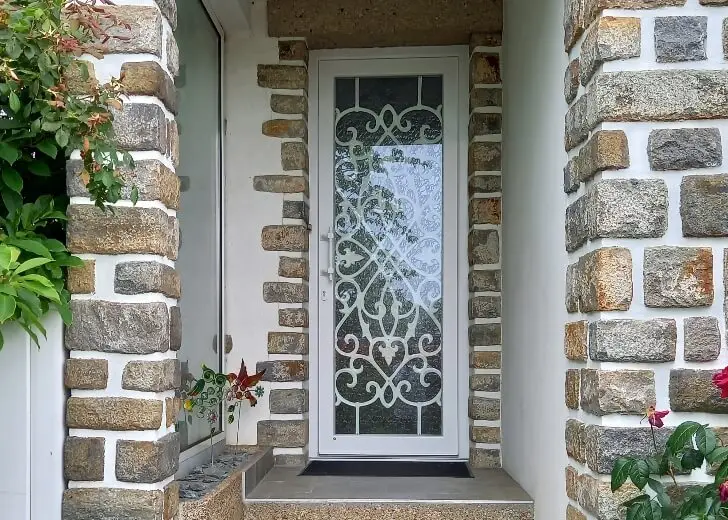

In [19]:
input_image = base64.b64decode(encoded_image)
display(Image(data=input_image, width=500))

In [21]:
# Using an image URL
message_url = (
    "human",
    [
        {"type": "text", "text": "Describe this image."},
        {"type": "image_url", "image_url": f"data:image/png;base64,{encoded_image}"},
    ],
)
result_url = llm.invoke([message_url])
print(result_url.content)

This image presents an eye-level view of an inviting and well-maintained building entrance, characterized by a blend of rustic stone and modern elements.

At the center is a white-framed door with a large, clear glass panel. The most prominent feature of the door is the intricate, white, wrought-iron-style scrollwork design overlaying the glass. This ornate pattern features elegant swirls, heart-like shapes, and organic motifs, creating a decorative and somewhat traditional aesthetic. The glass reflects hints of green foliage and sky, suggesting an outdoor setting. The door is fitted with a white handle set and a lock. Directly beneath the door is a simple black doormat.

The entrance is flanked by two substantial, square-cut columns built from rough-hewn, irregularly shaped stone blocks. These blocks vary in size and display natural tones of gray, brown, and tan, set against wide, white mortar lines. The wall directly surrounding the white door frame is also adorned with narrower, mor

In [23]:
image_style = "minimalism"
wordLimit = 150
tone = "Professional"

In [28]:
human_prompt_2 = (
    "Tryba company provides doors and windows to customers.\n"
    f"Given the image of a door - a product of the company, generate a new image in the style of {image_style}. \n"
    "Write a Instagam post about the product highlighting in the image.\n"
    "Key guidelines:\n"
    f"- Write in a {tone.lower()} tone\n"
    f"- Aim for approximately {wordLimit} words\n"
    "- Write in a natural, conversational style\n"
    "- Use simple, everyday language\n"
)

In [29]:
print(human_prompt_2)

Tryba company provides doors and windows to customers.
Given the image of a door - a product of the company, generate a new image in the style of minimalism. 
Write a Instagam post about the product highlighting in the image.
Key guidelines:
- Write in a professional tone
- Aim for approximately 150 words
- Write in a natural, conversational style
- Use simple, everyday language



In [30]:
# Image + text -> image + text
image_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-image-preview")

E0000 00:00:1758467640.412776 31404670 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [31]:
# Using an image URL
messages = [
    ("system", system_prompt),
    (
        "human",
        [
            {"type": "text", "text": human_prompt_2},
            {
                "type": "image_url",
                "image_url": f"data:image/png;base64,{encoded_image}",
            },
        ],
    ),
]

response = image_llm.invoke(
    messages,
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

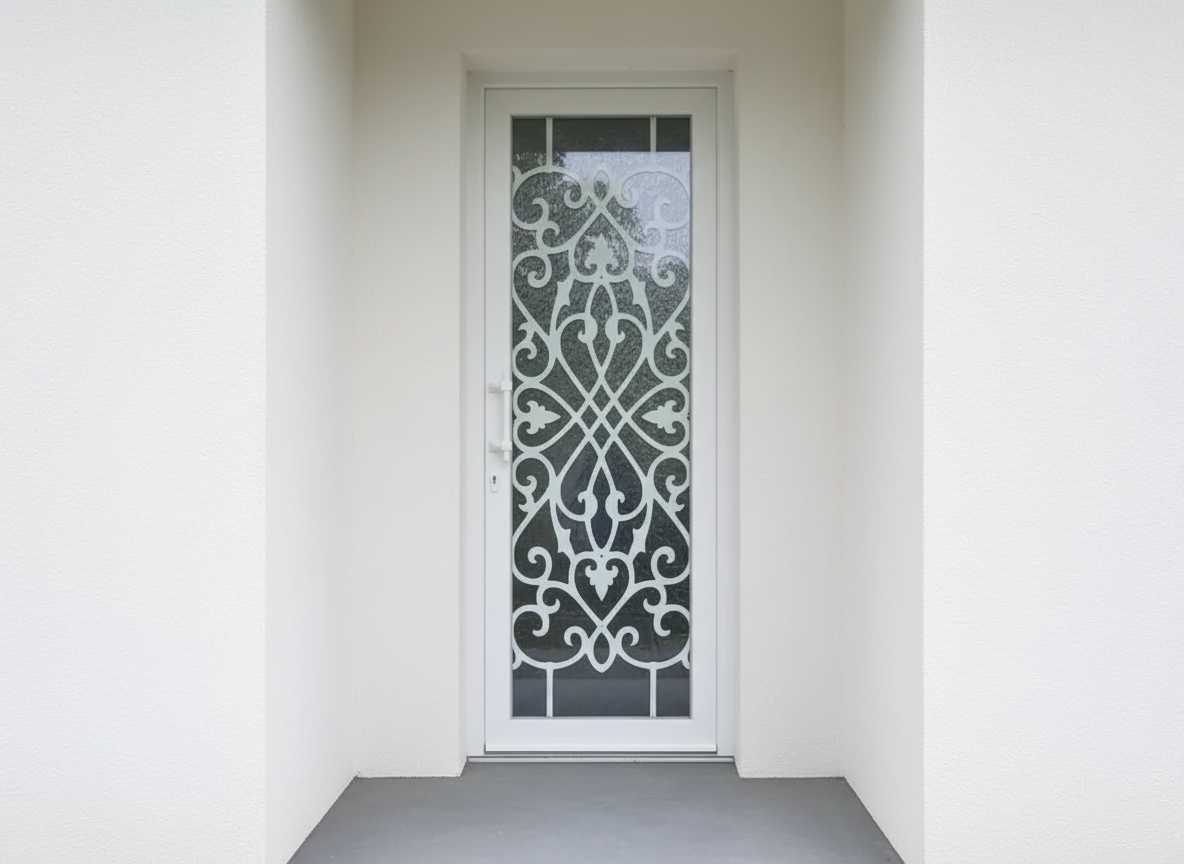

In [33]:
image_base64 = response.content[1].get("image_url").get("url").split(",")[-1]
image_data = base64.b64decode(image_base64)
display(Image(data=image_data, width=500))

In [34]:
print(response.content[2])

Ready to elevate your home's entrance? ✨ At Tryba, we believe your front door is more than just an entry point—it's a statement. This stunning door, featuring intricate frosted glass detailing, perfectly blends classic elegance with modern security.

Imagine the natural light filtering through, creating a warm and inviting ambiance in your entryway, all while maintaining your privacy. Crafted with precision and built to last, our doors offer exceptional insulation and robust security features, giving you peace of mind.

We're passionate about helping you find the perfect door that reflects your style and enhances your home's curb appeal. Let us help you make a lasting first impression!

#TrybaDoors #HomeImprovement #FrontDoorGoals #ElegantEntry #QualityCraftsmanship
